# Project 2
# Name of Project- Market Basket Analysis in Python using Apriori Algorithm

* Name   : Aravalam Rajasekhar
* gmail  : rasekhar6@gmail.com
* phone no : 9849692369
* Course : B.Tech (Final Year)
* College : SVU COLLEGE OF ENGINEERING (TIRUPATI)

# Problem Statement :     

Whenever you visit a retail supermarket, you will find that baby 
diapers and wipes, bread and butter, pizza base and cheese, beer, and chips are positioned together in the store for sales. This is what market basket analysis is all about analyzing the association among products bought 
together by customers. Market basket analysis is a versatile use case in the 
retail industry that helps cross-sell products in a physical outlet and also helps 
e-commerce businesses recommend products to customers based on 
product associations. Apriori and FP growth are the most popular machine 
learning algorithms used for association learning to perform market basket 
analysis. 


# Importing Packages

In [53]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('max_rows', None)
pd.set_option('max_columns', None)

# Import Data & Data Preprocessing

In [54]:
df = pd.read_excel("/content/sample_data/Online Retail (1).xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [55]:
df = df.dropna()

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [57]:
df1 = df[df['Quantity']>=0]

In [58]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [59]:
df.shape

(406829, 8)

In [60]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [61]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


# Data Cleaning
* First, some of the descriptions have spaces that need to be removed.
* We’ll also drop the rows that don’t have invoice numbers
* remove the credit transactions (those with invoice numbers containing C).

In [62]:
df['Description'] = df['Description'].str.strip() #remove empty spaces
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True) #drop rows that dont have invoice numbers. 
df['InvoiceNo'] = df['InvoiceNo'].astype('str') #convert Invoice No to String
df = df[~df['InvoiceNo'].str.contains('C')] #drop rows with invoice containg C which means Credit Transcation.

In [63]:
df.shape

(397924, 8)

# Data Exploratory

In [64]:
most_prefered_items = df.groupby(['StockCode', 'UnitPrice'])[['Quantity']].sum().sort_values(by=['Quantity'],ascending=False).head(10)

most_prefered_items

Quantity
StockCode UnitPrice          
23843     2.08          80995
23166     1.04          76087
22197     0.72          36136
84077     0.29          27528
          0.21          23904
84879     1.69          22106
85123A    2.55          19998
23084     1.79          19961
85099B    1.79          19136
21212     0.55          17534

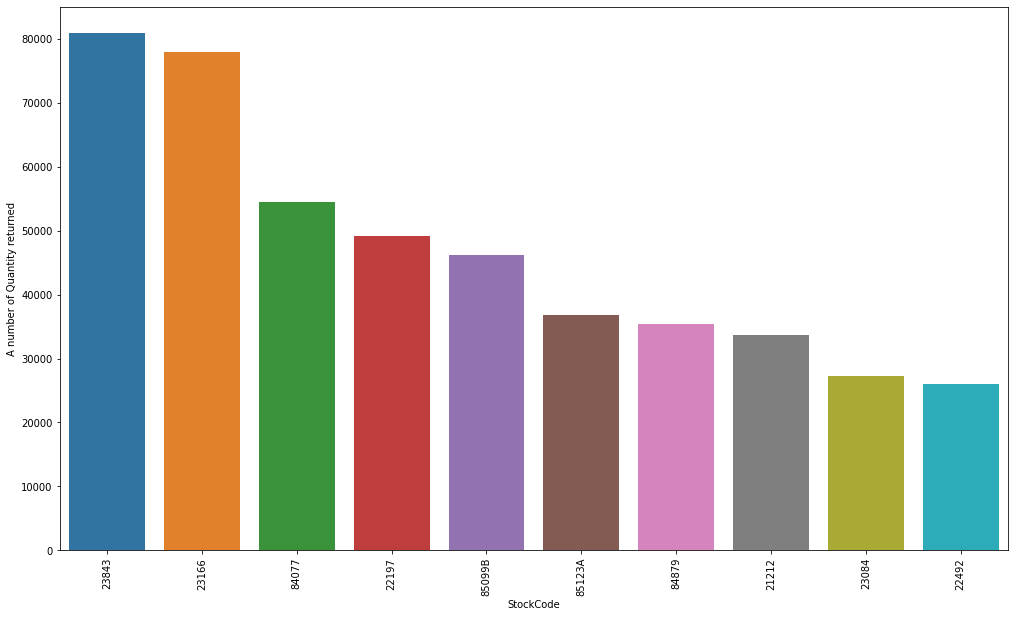

,Quantity
StockCode,
23843,80995
23166,77916
84077,54415
22197,49183
85099B,46181
85123A,36782
84879,35362
21212,33693
23084,27202


Quantity
StockCode UnitPrice          
23843     2.08          80995
23166     1.04          76087
22197     0.72          36136
84077     0.29          27528
          0.21          23904
84879     1.69          22106
85123A    2.55          19998
23084     1.79          19961
85099B    1.79          19136
21212     0.55          17534

In [65]:
most_prefered_items1 = df.groupby(['StockCode'])[['Quantity']].sum().sort_values(by=['Quantity'],ascending=False).head(10)

most_prefered_items2 = df.groupby(['StockCode', 'UnitPrice'])[['Quantity']].sum().sort_values(by=['Quantity'],ascending=False).head(10)

sns.barplot(x=most_prefered_items1.index, y=most_prefered_items1['Quantity'])
plt.ylabel('A number of Quantity returned')
plt.xticks(rotation=90)
plt.show()

display(most_prefered_items1)
display(most_prefered_items2)

StockCode of 23843 & 23166 are returned in more number of quantities

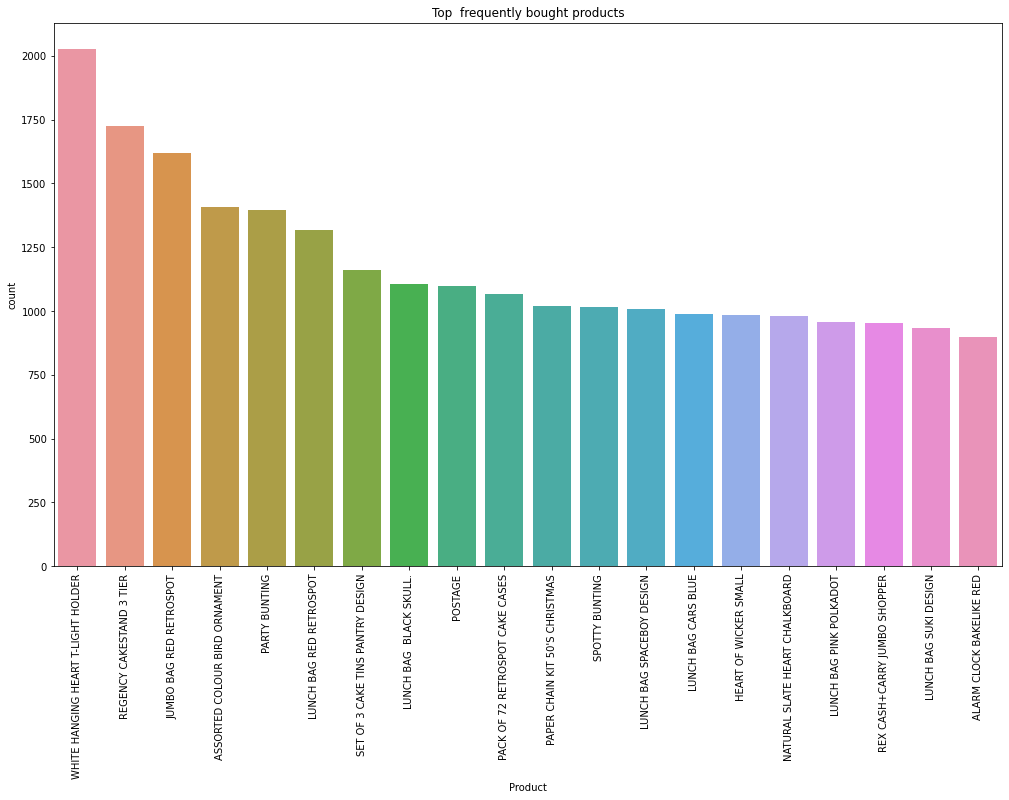

In [66]:
#Top  frequently bought products
plt.rcParams['figure.figsize']=17,10
sns.countplot(data=df, x=df['Description'],
             order = df['Description'].value_counts().head(20).index)
plt.xticks(rotation=90)
plt.xlabel('Product')
plt.title('Top  frequently bought products')
plt.show()

* WHITE HANGING HEART-LIGHT HOLDER,REGENCY CAKESTAND 3 TIER,JUMBO BAG RED RETROSPOT tops the list of frequently bought products

Quantity                  
                          sum       mean median
Country                                        
United Kingdom        4269472  12.048913    4.0
Netherlands            200937  85.034702   72.0
EIRE                   140525  19.414894   12.0
Germany                119263  13.189892   10.0
France                 111472  13.362743   10.0
Australia               84209  71.062447   32.0
Sweden                  36083  80.006652   24.0
Switzerland             30083  16.331705   12.0
Spain                   27951  11.247887    6.0
Japan                   26016  81.046729   48.0
Belgium                 23237  11.441162   10.0
Norway                  19338  18.039179   12.0
Portugal                16122  11.027360   10.0
Finland                 10704  15.626277   10.0
Channel Islands          9491  12.688503   10.0
Denmark                  8235  21.671053   12.0
Italy                    8112  10.701847    8.0
Cyprus                   6361  10.359935    5.0
Singapore                5241  23.608108   12.0
Austria                  4881  12.263819   10.0
Israel                   4046  16.314516   12.0
Poland                   3684  11.163636   10.0
Canada                   2763  18.298013   12.0
Iceland                  2458  13.505495   12.0
USA                      2458  13.731844   12.0
Unspecified              1789   7.331967    2.0
Greece                   1557  10.737931   10.0
United Arab Emirates      982  14.441176   12.0
Malta                     970   8.660714    6.0
Czech Republic            671  26.840000   24.0
Lithuania                 652  18.628571   16.0
European Community        499   8.316667    6.0
Lebanon                   386   8.577778    8.0
Brazil                    356  11.125000   10.0
RSA                       352   6.068966    6.0
Bahrain                   260  15.294118    6.0
Saudi Arabia               80   8.888889   12.0

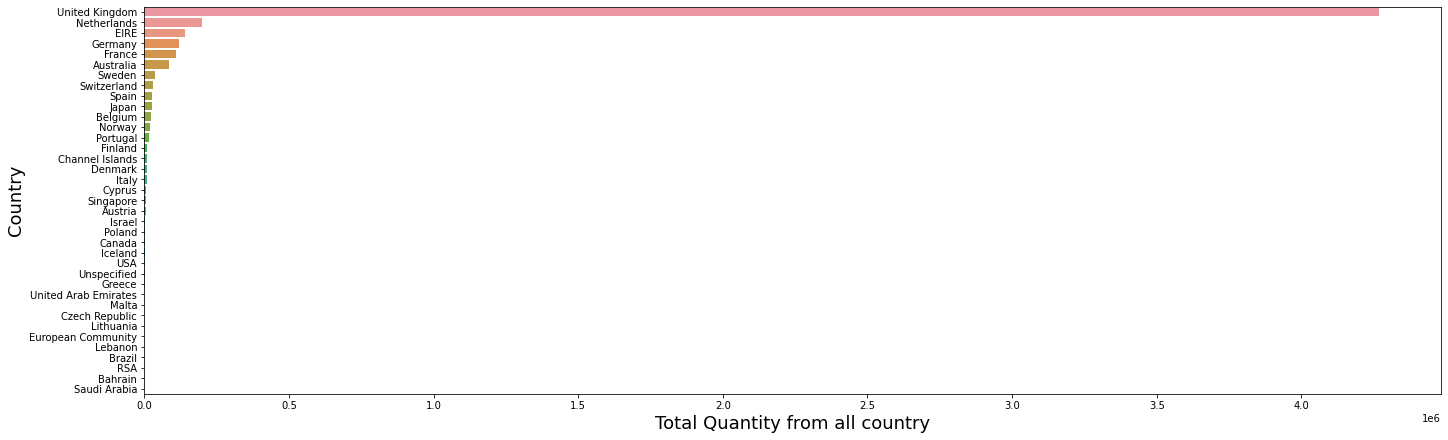

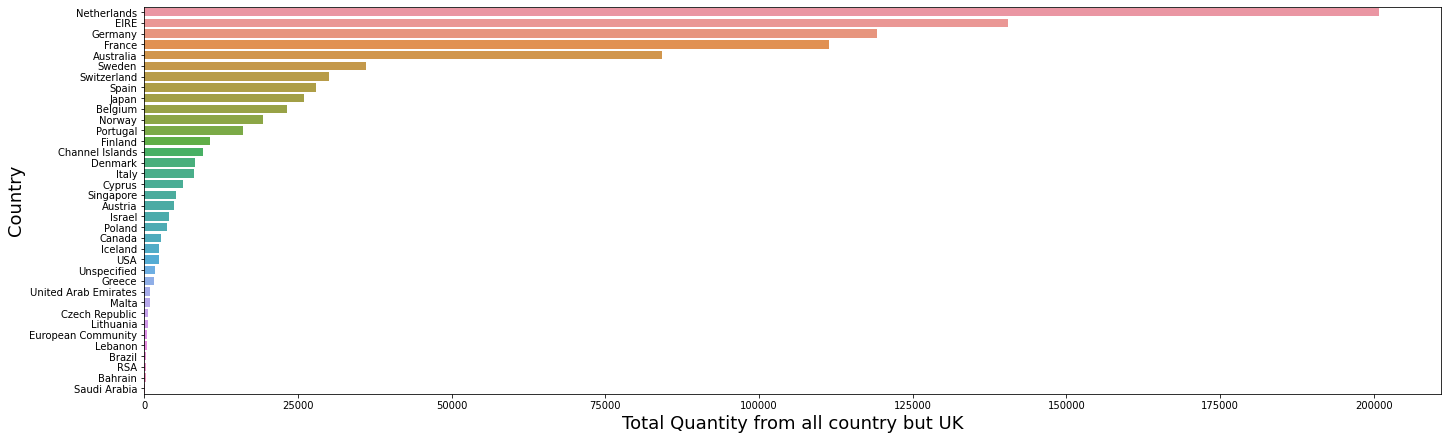

In [67]:
country_quantity = df.groupby('Country')[['Quantity']].agg(['sum',
                                        'mean',
                                        'median']).sort_values(by=[('Quantity', 'sum')], ascending=False)

display(country_quantity)

fig = plt.figure(constrained_layout=True, figsize=(20, 6))
a = sns.barplot(y=country_quantity.index, x=country_quantity[('Quantity', 'sum')])
plt.xlabel('Total Quantity from all country', fontsize=18)
plt.ylabel('Country', fontsize=18)


fig = plt.figure(constrained_layout=True, figsize=(20, 6))
country_quantity = country_quantity.drop('United Kingdom')
sns.barplot(y=country_quantity.index, x=country_quantity[('Quantity', 'sum')])
plt.xlabel('Total Quantity from all country but UK', fontsize=18)
plt.ylabel('Country', fontsize=18)
plt.show()

* Total quantities are more in country **United Kingdom** followed by **Netherlands**

After the cleanup, we need to consolidate the items into 1 transaction per row with each product 1 hot encoded. For the sake of keeping the data set small, I’m only looking at sales for France.

In [68]:
basket = (df[df['Country'] =="France"]        #get data for samples which have Country as France
          .groupby(['InvoiceNo', 'Description'])['Quantity'] #group them on InvoiceNo and Description based on Quantity
          .sum().unstack().reset_index().fillna(0) #sum the quantity, unstack them, fill 0 to nan values. 
          .set_index('InvoiceNo')) #set the index as Invoice Number


In [69]:
basket.head()

Description  10 COLOUR SPACEBOY PEN  12 COLOURED PARTY BALLOONS  \
InvoiceNo                                                         
536370                          0.0                         0.0   
536852                          0.0                         0.0   
536974                          0.0                         0.0   
537065                          0.0                         0.0   
537463                          0.0                         0.0   

Description  12 EGG HOUSE PAINTED WOOD  12 MESSAGE CARDS WITH ENVELOPES  \
InvoiceNo                                                                 
536370                             0.0                              0.0   
536852                             0.0                              0.0   
536974                             0.0                              0.0   
537065                             0.0                              0.0   
537463                             0.0                              0.0   

Description  12 PENCIL SMALL TUBE WOODLAND  \
InvoiceNo                                    
536370                                 0.0   
536852                                 0.0   
536974                                 0.0   
537065                                 0.0   
537463                                 0.0   

Description  12 PENCILS SMALL TUBE RED RETROSPOT  12 PENCILS SMALL TUBE SKULL  \
InvoiceNo                                                                       
536370                                       0.0                          0.0   
536852                                       0.0                          0.0   
536974                                       0.0                          0.0   
537065                                       0.0                          0.0   
537463                                       0.0                          0.0   

Description  12 PENCILS TALL TUBE POSY  12 PENCILS TALL TUBE RED RETROSPOT  \
InvoiceNo                                                                    
536370                             0.0                                 0.0   
536852                             0.0                                 0.0   
536974                             0.0                                 0.0   
537065                             0.0                                 0.0   
537463                             0.0                                 0.0   

Description  12 PENCILS TALL TUBE WOODLAND  \
InvoiceNo                                    
536370                                 0.0   
536852                                 0.0   
536974                                 0.0   
537065                                 0.0   
537463                                 0.0   

Description  15CM CHRISTMAS GLASS BALL 20 LIGHTS  \
InvoiceNo                                          
536370                                       0.0   
536852                                       0.0   
536974                                       0.0   
537065                                       0.0   
537463                                       0.0   

Description  16 PIECE CUTLERY SET PANTRY DESIGN  \
InvoiceNo                                         
536370                                      0.0   
536852                                      0.0   
536974                                      0.0   
537065                                      0.0   
537463                                      0.0   

Description  18PC WOODEN CUTLERY SET DISPOSABLE  20 DOLLY PEGS RETROSPOT  \
InvoiceNo                                                                  
536370                                      0.0                      0.0   
536852                                      0.0                      0.0   
536974                                      0.0                      0.0   
537065                                      0.0                      0.0   
537463                                      0.0                 

In [70]:
basket.shape

(389, 1543)

# Hot encoding the Data

In [71]:
#below function converts a values < 0 to 0 and value greater than equal 1 to 1.  
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
#apply function to data using applymap.
basket_sets = basket.applymap(encode_units)

In [72]:
basket_sets.head()

Description  10 COLOUR SPACEBOY PEN  12 COLOURED PARTY BALLOONS  \
InvoiceNo                                                         
536370                            0                           0   
536852                            0                           0   
536974                            0                           0   
537065                            0                           0   
537463                            0                           0   

Description  12 EGG HOUSE PAINTED WOOD  12 MESSAGE CARDS WITH ENVELOPES  \
InvoiceNo                                                                 
536370                               0                                0   
536852                               0                                0   
536974                               0                                0   
537065                               0                                0   
537463                               0                                0   

Description  12 PENCIL SMALL TUBE WOODLAND  \
InvoiceNo                                    
536370                                   0   
536852                                   0   
536974                                   0   
537065                                   0   
537463                                   0   

Description  12 PENCILS SMALL TUBE RED RETROSPOT  12 PENCILS SMALL TUBE SKULL  \
InvoiceNo                                                                       
536370                                         0                            0   
536852                                         0                            0   
536974                                         0                            0   
537065                                         0                            0   
537463                                         0                            0   

Description  12 PENCILS TALL TUBE POSY  12 PENCILS TALL TUBE RED RETROSPOT  \
InvoiceNo                                                                    
536370                               0                                   0   
536852                               0                                   0   
536974                               0                                   0   
537065                               0                                   0   
537463                               0                                   0   

Description  12 PENCILS TALL TUBE WOODLAND  \
InvoiceNo                                    
536370                                   0   
536852                                   0   
536974                                   0   
537065                                   0   
537463                                   0   

Description  15CM CHRISTMAS GLASS BALL 20 LIGHTS  \
InvoiceNo                                          
536370                                         0   
536852                                         0   
536974                                         0   
537065                                         0   
537463                                         0   

Description  16 PIECE CUTLERY SET PANTRY DESIGN  \
InvoiceNo                                         
536370                                        0   
536852                                        0   
536974                                        0   
537065                                        0   
537463                                        0   

Description  18PC WOODEN CUTLERY SET DISPOSABLE  20 DOLLY PEGS RETROSPOT  \
InvoiceNo                                                                  
536370                                        0                        0   
536852                                        0                        0   
536974                                        0                        0   
537065                                        0                        0   
537463                                        0                 

Now that the data is structured properly, we can generate frequent item sets that have a support of at least 7% (this number was chosen so that I could get enough useful examples)

#  Training Apriori algorithm on the dataset

In [73]:
frequent_itemsets = apriori(basket_sets, min_support=0.03, use_colnames=True).sort_values('support', ascending=False).reset_index(drop=True)

frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

# Top-20 frequent items

In [74]:
frequent_itemsets.head(20)

,support,itemsets,length
0,0.771208,(POSTAGE),1
1,0.187661,(RABBIT NIGHT LIGHT),1
2,0.179949,(RED TOADSTOOL LED NIGHT LIGHT),1
3,0.172237,(PLASTERS IN TIN WOODLAND ANIMALS),1
4,0.169666,(PLASTERS IN TIN CIRCUS PARADE),1
5,0.167095,"(POSTAGE, RABBIT NIGHT LIGHT)",2
6,0.159383,"(POSTAGE, RED TOADSTOOL LED NIGHT LIGHT)",2
7,0.159383,(ROUND SNACK BOXES SET OF4 WOODLAND),1
8,0.154242,(LUNCH BAG RED RETROSPOT),1
9,0.149100,"(POSTAGE, PLASTERS IN TIN CIRCUS PARADE)",2


In [75]:
frequent_itemsets[ (frequent_itemsets['length']  == 2) & (frequent_itemsets['support'] >= 0.2) ]

,support,itemsets,length


# Defining the rules 

The final step is to generate the rules with their corresponding support, confidence and lift.

In [76]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(POSTAGE),(RABBIT NIGHT LIGHT),0.771208,0.187661,0.167095,0.216667,1.154566,0.022370,1.037029
1,(RABBIT NIGHT LIGHT),(POSTAGE),0.187661,0.771208,0.167095,0.890411,1.154566,0.022370,2.087725
2,(POSTAGE),(RED TOADSTOOL LED NIGHT LIGHT),0.771208,0.179949,0.159383,0.206667,1.148476,0.020605,1.033678
3,(RED TOADSTOOL LED NIGHT LIGHT),(POSTAGE),0.179949,0.771208,0.159383,0.885714,1.148476,0.020605,2.001928
4,(POSTAGE),(PLASTERS IN TIN CIRCUS PARADE),0.771208,0.169666,0.149100,0.193333,1.139495,0.018253,1.029340


# we look for a large lift > 1 and high confidence (0.50)

# Displaying top-20 columns

In [77]:
rules[(rules['lift'] > 1) & (rules['confidence'] >= 0.50)].head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(RABBIT NIGHT LIGHT),(POSTAGE),0.187661,0.771208,0.167095,0.890411,1.154566,0.022370,2.087725
3,(RED TOADSTOOL LED NIGHT LIGHT),(POSTAGE),0.179949,0.771208,0.159383,0.885714,1.148476,0.020605,2.001928
5,(PLASTERS IN TIN CIRCUS PARADE),(POSTAGE),0.169666,0.771208,0.149100,0.878788,1.139495,0.018253,1.887532
7,(ROUND SNACK BOXES SET OF4 WOODLAND),(POSTAGE),0.159383,0.771208,0.149100,0.935484,1.213011,0.026183,3.546272
9,(PLASTERS IN TIN WOODLAND ANIMALS),(POSTAGE),0.172237,0.771208,0.138817,0.805970,1.045075,0.005987,1.179158
10,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.128535,0.138817,0.123393,0.960000,6.915556,0.105550,21.529563
11,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.138817,0.128535,0.123393,0.888889,6.915556,0.105550,7.843188
13,(LUNCH BAG RED RETROSPOT),(POSTAGE),0.154242,0.771208,0.123393,0.800000,1.037333,0.004441,1.143959
15,(SET/6 RED SPOTTY PAPER CUPS),(POSTAGE),0.138817,0.771208,0.118252,0.851852,1.104568,0.011195,1.544344
17,(RED RETROSPOT MINI CASES),(POSTAGE),0.138817,0.771208,0.115681,0.833333,1.080556,0.008624,1.372751


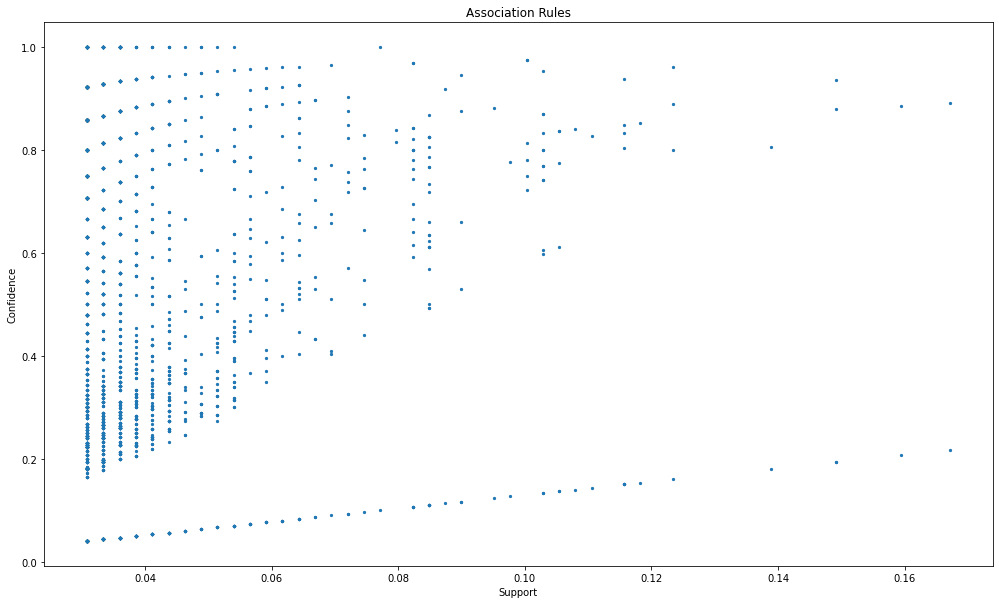

In [78]:
rules.plot.scatter("support", "confidence", alpha=1, marker=".")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Association Rules")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


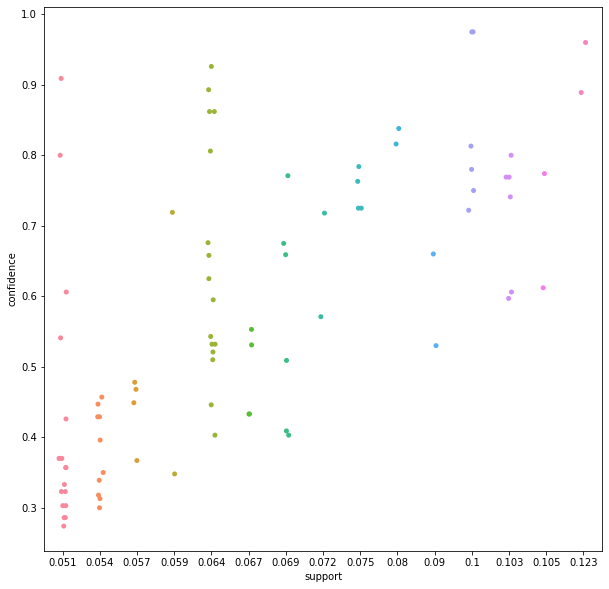

In [79]:
basket_gm=df[df['Country']=='France'].groupby(['InvoiceNo','Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')
baskets_gm=basket_gm.applymap(encode_units)
baskets_gm.drop('POSTAGE',inplace=True,axis=1)  
frequent_items_gm=apriori(baskets_gm,min_support=0.05,use_colnames=True) #lower cutoff for support for Germany
rules_gm=association_rules(frequent_items_gm,metric="lift",min_threshold=1)
rules_tran_gm=pd.DataFrame(rules_gm[['antecedents','consequents','lift','confidence','support']])
#filter top rules
top_rules_gm=rules_tran_gm.groupby(['antecedents', 'consequents']).first().reset_index().sort_values(['lift'],ascending=False).head()
plt.figure(figsize=(10,10))
sns.stripplot(round(rules_tran_gm['support'],3), round(rules_tran_gm['confidence'],3),data=rules_tran_gm,jitter=True)
plt.show()

# Conclusion :      

* If the lift > 1,then we can say that customers buying more than 1 products combination is more frequent.But here there are no such combinations whose lift value is more than 1.

* So,there is no such combinations of creating combo pack offer